AIM: Build a decision tree to classify patients as diabetic or not (using PIMA dataset). Visualise the decision tree. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import graphviz
from sklearn import tree

In [2]:
df = pd.read_csv("/content/diabetes.csv")
print("Dataset Sample:")
print(df.head())

Dataset Sample:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [6]:
y_pred = dt.predict(X_test)

In [7]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7272727272727273

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154



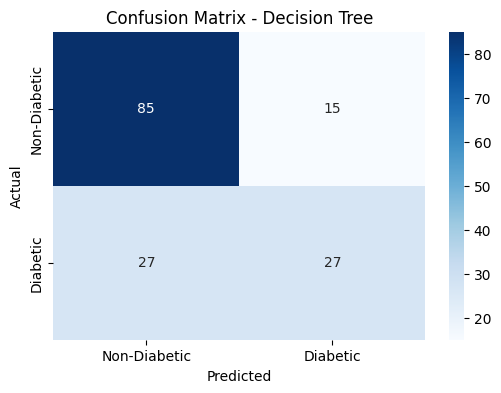

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

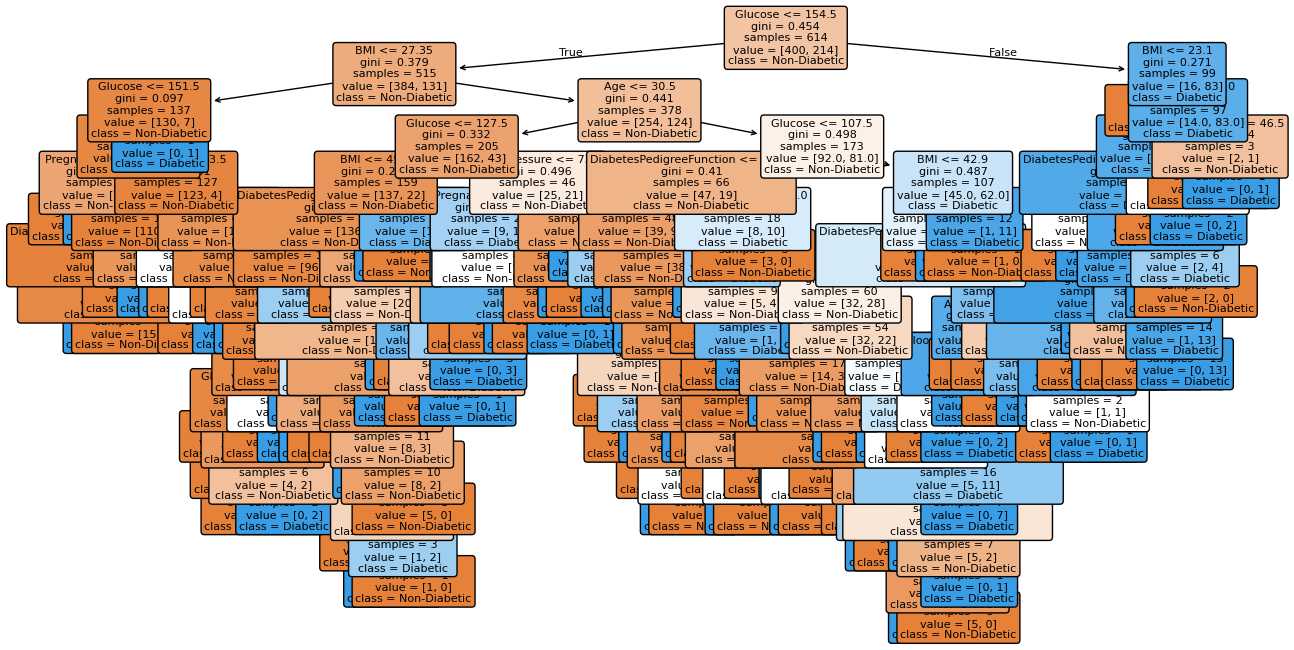

In [9]:
plt.figure(figsize=(15, 8))
tree.plot_tree(dt, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'],
               filled=True, rounded=True, fontsize=8)
plt.show()

In [10]:
dt_pruned = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

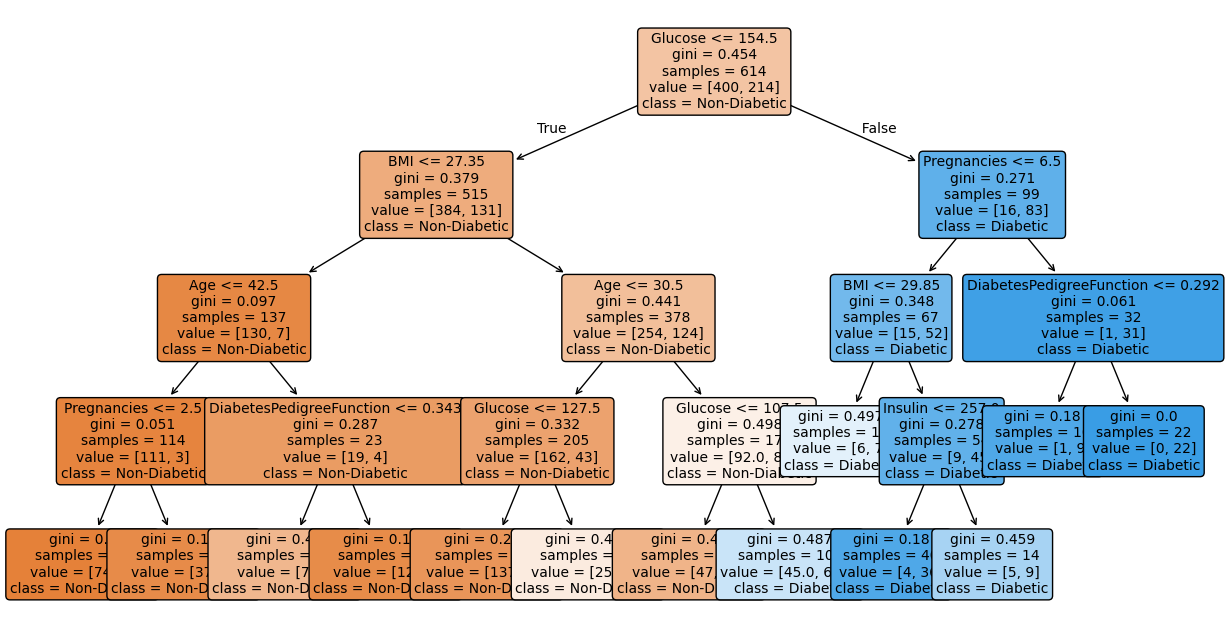

In [12]:
plt.figure(figsize=(15, 8))
tree.plot_tree(dt_pruned, feature_names=X.columns,
          class_names=['Non-Diabetic', 'Diabetic'],
          filled=True, rounded=True, fontsize=10)
plt.show()

In [14]:
dot_data = export_graphviz(dt_pruned, out_file=None,
                           feature_names=X.columns,
                           class_names=['Non-Diabetic', 'Diabetic'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("pima_decision_tree")

'pima_decision_tree.pdf'